<a href="https://colab.research.google.com/github/pravinshukla108/Book-Recommendation-System-Unsupervised-Machine-Learning-/blob/main/Book_Recommendation_System(Unsupervised_Machine_Learning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='#191970'>**Project Name**    -  **Book Recommendation System**



##### **Project Type**    - <font color='blue'>***Unsupervised Machine Learning .***
##### **Contribution**    - <font color='green'>***Individual***
##### **Name -** <font color='red'>***Pravin Kumar Shukla***


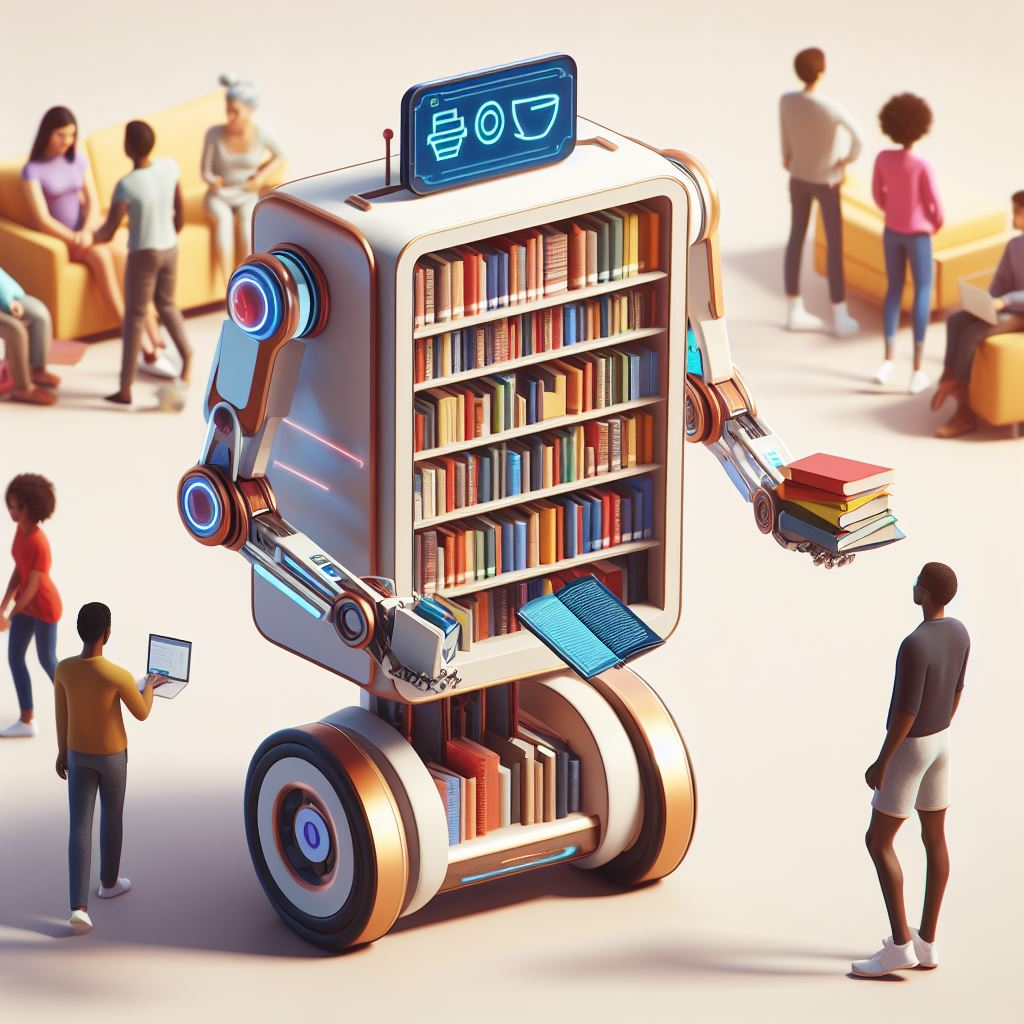

# <font color='#191970'>**Project Summary -**


- <font color='dark orange'> Recommender systems suggest relevant items like movies, books, or products to users. They're crucial in industries, driving significant income when efficient. They also offer a competitive edge by enhancing user experience and engagement.


- <font color='darkgreen'>In this project, I develop a book recommendation system using Unsupervised Machine Learning. I leverage three datasets - Books.csv, Users.csv, Ratings.csv - to enhance user book recommendations.

# <font color='#191970'>**GitHub Link -**

[PRAVIN'S GitHub Link](https://github.com/pravinshukla108/Book-Recommendation-System-Unsupervised-Machine-Learning-.git)

## <font color='#191970'>**Problem Statement**


<font color='dark orange'>Recommender systems are algorithms designed to suggest relevant items to users, spanning movies, text, products, and more across various industries.

<font color='blue'>They prove highly effective, generating substantial profits when efficient and offering a competitive edge in the market.

 <font color='green'>Our primary goal is to create a book recommendation system for users.

# <font color='MidnightBlue'>***Let's Begin !***

## <font color='#191970'>***1. Know Your Data***

### Import Libraries

In [671]:
#Data Handling Libraries:
import pandas as pd
import numpy as np
#Visualization Libraries:

import missingno as msno # Visualizing missing data.
import matplotlib.pyplot as plt #Plotting graphs and visualizations.
import seaborn as sns #Statistical data visualization.

#Machine Learning Libraries:

from sklearn.neighbors import NearestNeighbors # Used for nearest neighbor algorithm.
from sklearn.feature_extraction.text import TfidfVectorizer # Feature extraction from text data.
from scipy.sparse import csr_matrix  # Compressed Sparse Row matrix representation.
from sklearn.cluster import KMeans # KMeans clustering algorithm.
# Handling warnings, with a filter set to ignore warnings.
import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [672]:
from google.colab import drive
drive.mount('/pravin_drive')

Drive already mounted at /pravin_drive; to attempt to forcibly remount, call drive.mount("/pravin_drive", force_remount=True).


In [673]:
# Load Dataset

books = pd.read_csv('/pravin_drive/MyDrive/Colab Notebooks/Book Recommendation System (Unsupervised ML)/Books.csv')
ratings = pd.read_csv('/pravin_drive/MyDrive/Colab Notebooks/Book Recommendation System (Unsupervised ML)/Ratings.csv')
users = pd.read_csv('/pravin_drive/MyDrive/Colab Notebooks/Book Recommendation System (Unsupervised ML)/Users.csv')


In [674]:
# ANSI color codes
class Color:
    HEADER = '\033[95m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

### Dataset First View

In [675]:
# Dataset First Look
books.sample(6)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
153381,0553347403,"Cosmic Coincidences: Dark Matter, Mankind, and...",John Gribbin,1989,Bantam Dell Pub Group,http://images.amazon.com/images/P/0553347403.0...,http://images.amazon.com/images/P/0553347403.0...,http://images.amazon.com/images/P/0553347403.0...
269239,4888720304,The creative family,Daisaku Ikeda,1992,Nichiren Shoshu International Center,http://images.amazon.com/images/P/4888720304.0...,http://images.amazon.com/images/P/4888720304.0...,http://images.amazon.com/images/P/4888720304.0...
9754,0446603929,See How They Run,James Patterson,1997,Warner Books,http://images.amazon.com/images/P/0446603929.0...,http://images.amazon.com/images/P/0446603929.0...,http://images.amazon.com/images/P/0446603929.0...
258561,0060140186,The delphinium girl,Mark Smith,1980,Harper &amp; Row,http://images.amazon.com/images/P/0060140186.0...,http://images.amazon.com/images/P/0060140186.0...,http://images.amazon.com/images/P/0060140186.0...
34612,0060394455,The Family: A Novel,Mario Puzo,2001,ReganBooks,http://images.amazon.com/images/P/0060394455.0...,http://images.amazon.com/images/P/0060394455.0...,http://images.amazon.com/images/P/0060394455.0...
98767,080410428X,A Cold Red Sunrise: An Inspector Porfiry Rostn...,Stuart M. Kaminsky,1989,Fawcett Books,http://images.amazon.com/images/P/080410428X.0...,http://images.amazon.com/images/P/080410428X.0...,http://images.amazon.com/images/P/080410428X.0...


In [676]:
# Dataset First Look
ratings.sample(6)

,User-ID,ISBN,Book-Rating
926085,225199,068482471X,0
143974,32195,0553264079,0
1100017,264152,034528349X,8
829381,200674,0373117671,0
279,276859,0789706032,8
9006,278535,0449219364,0


In [677]:
# Dataset First Look
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


### Dataset Rows & Columns count

In [678]:
# Dataset Rows & Columns count
datasets = {
    "Books": books.shape,
    "Ratings": ratings.shape,
    "Users": users.shape
}

for dataset, shape in datasets.items():
    print(f"{Color.HEADER}Total rows & columns in {dataset} dataset:{Color.BLUE} {shape}{Color.ENDC}")



Total rows & columns in Books dataset: (271360, 8)
Total rows & columns in Ratings dataset: (1149780, 3)
Total rows & columns in Users dataset: (278858, 3)


## <font color='#191970'>**Dataset Information**

###<font color='RED'> Books

In [679]:
# Displaying dataset information with color
print(f"{Color.HEADER}Books Dataset Information:{Color.GREEN}")
print(books.info())

Books Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB
None


#### <font color='darkblue'>We get to know these insights from our dataset.



<font color='red'>1. <font color='blue'>**Columns & Types:**
   - Eight columns, all with string data types (objects).
   - "Year-Of-Publication" might contain non-numeric entries.

<font color='red'>2. <font color='blue'>**Null Counts:**
   - Missing values in "Book-Author," "Publisher," and "Image-URL-L."

<font color='red'>3. <font color='blue'>**Total Entries:**
   - Dataset contains 271,360 entries.

<font color='red'>4. <font color='blue'>**Memory Usage:**
   - Occupies around 16.6+ MB in memory.
   
  

### <font color='RED'>Ratings

In [680]:
# Displaying dataset information for ratings with color
print(f"{Color.HEADER}Ratings Dataset Information:{Color.GREEN}")
print(ratings.info())

Ratings Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB
None


#### <font color='darkblue'>We get to know these insights from our dataset.




- <font color='blue'>**Entries**: <font color='dark orange'>1,149,780
- <font color='blue'>**Columns**: <font color='dark orange'>3
- <font color='blue'>**Data Types**: <font color='dark orange'>int64 (2), object (1)
- <font color='blue'>**Memory Usage**: <font color='dark orange'>26.3+ MB




### <font color='RED'>Users

In [681]:
# Displaying dataset information for USERS with color
print(f"{Color.HEADER}Ratings Dataset Information:{Color.GREEN}")
print(users.info())

Ratings Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB
None


#### <font color='MidnightBlue'>We get to know these insights from our dataset.


- There are total of 2,78,858 entries and 3-columns only.
- User-id is of int64 data type, meanwhile location & age are object and float64 data type.
- There are null values as well in the dataset.

### Duplicate Values

In [682]:
# Dataset Duplicate Value Count
datasets = {
    "Books": books,
    "Ratings": ratings,
    "Users": users
}

for dataset, data in datasets.items():
    duplicate_count = data.duplicated().sum()

    print(f"{Color.HEADER}Total rows & columns in {dataset} dataset:{Color.BLUE} {duplicate_count}{Color.ENDC}")


Total rows & columns in Books dataset: 0
Total rows & columns in Ratings dataset: 0
Total rows & columns in Users dataset: 0


### Missing Values/Null Values

In [683]:
# Missing Values/Null Values Count
datasets = {
    "Books": books,
    "Ratings": ratings,
    "Users": users
}

for dataset, data in datasets.items():
    missing_values = data.isnull().mean()
    print(f"{Color.HEADER}Total missing/null values in {dataset} dataset:{Color.BLUE}")

    print(missing_values)
    print(f"{Color.ENDC}======================================================================================")


Total missing/null values in Books dataset:
ISBN                   0.000000
Book-Title             0.000000
Book-Author            0.000004
Year-Of-Publication    0.000000
Publisher              0.000007
Image-URL-S            0.000000
Image-URL-M            0.000000
Image-URL-L            0.000011
dtype: float64
Total missing/null values in Ratings dataset:
User-ID        0.0
ISBN           0.0
Book-Rating    0.0
dtype: float64
Total missing/null values in Users dataset:
User-ID     0.000000
Location    0.000000
Age         0.397199
dtype: float64


In [684]:
for column, value in missing_values.items():
        print(f"{Color.HEADER}{column}: {Color.BLUE}{value:.2%}")
        print(f"{Color.ENDC}======================================================================================")

User-ID: 0.00%
Location: 0.00%
Age: 39.72%


- **From the above we can say that :**
- **Books dataset has almost negligible missing value in their dataset.**
- **Ratings dataset has 0% data missing in their columns.**
- **Users dataset has almost 40% data missing in age column.**



In [685]:
# Missing Values/Null Values Count
datasets = {
    "Books": books,
    "Ratings": ratings,
    "Users": users
}

for dataset, data in datasets.items():
    missing_values = data.isnull().sum()
    print(f"Total Missing/null values in {dataset} dataset:")
    for column, count in missing_values.items():
        print(f"{Color.HEADER}{column}:   {Color.BLUE}{count}")
    print(f"{Color.ENDC}======================================================================================")


Total Missing/null values in Books dataset:
ISBN:   0
Book-Title:   0
Book-Author:   1
Year-Of-Publication:   0
Publisher:   2
Image-URL-S:   0
Image-URL-M:   0
Image-URL-L:   3
Total Missing/null values in Ratings dataset:
User-ID:   0
ISBN:   0
Book-Rating:   0
Total Missing/null values in Users dataset:
User-ID:   0
Location:   0
Age:   110762


<Figure size 700x500 with 0 Axes>

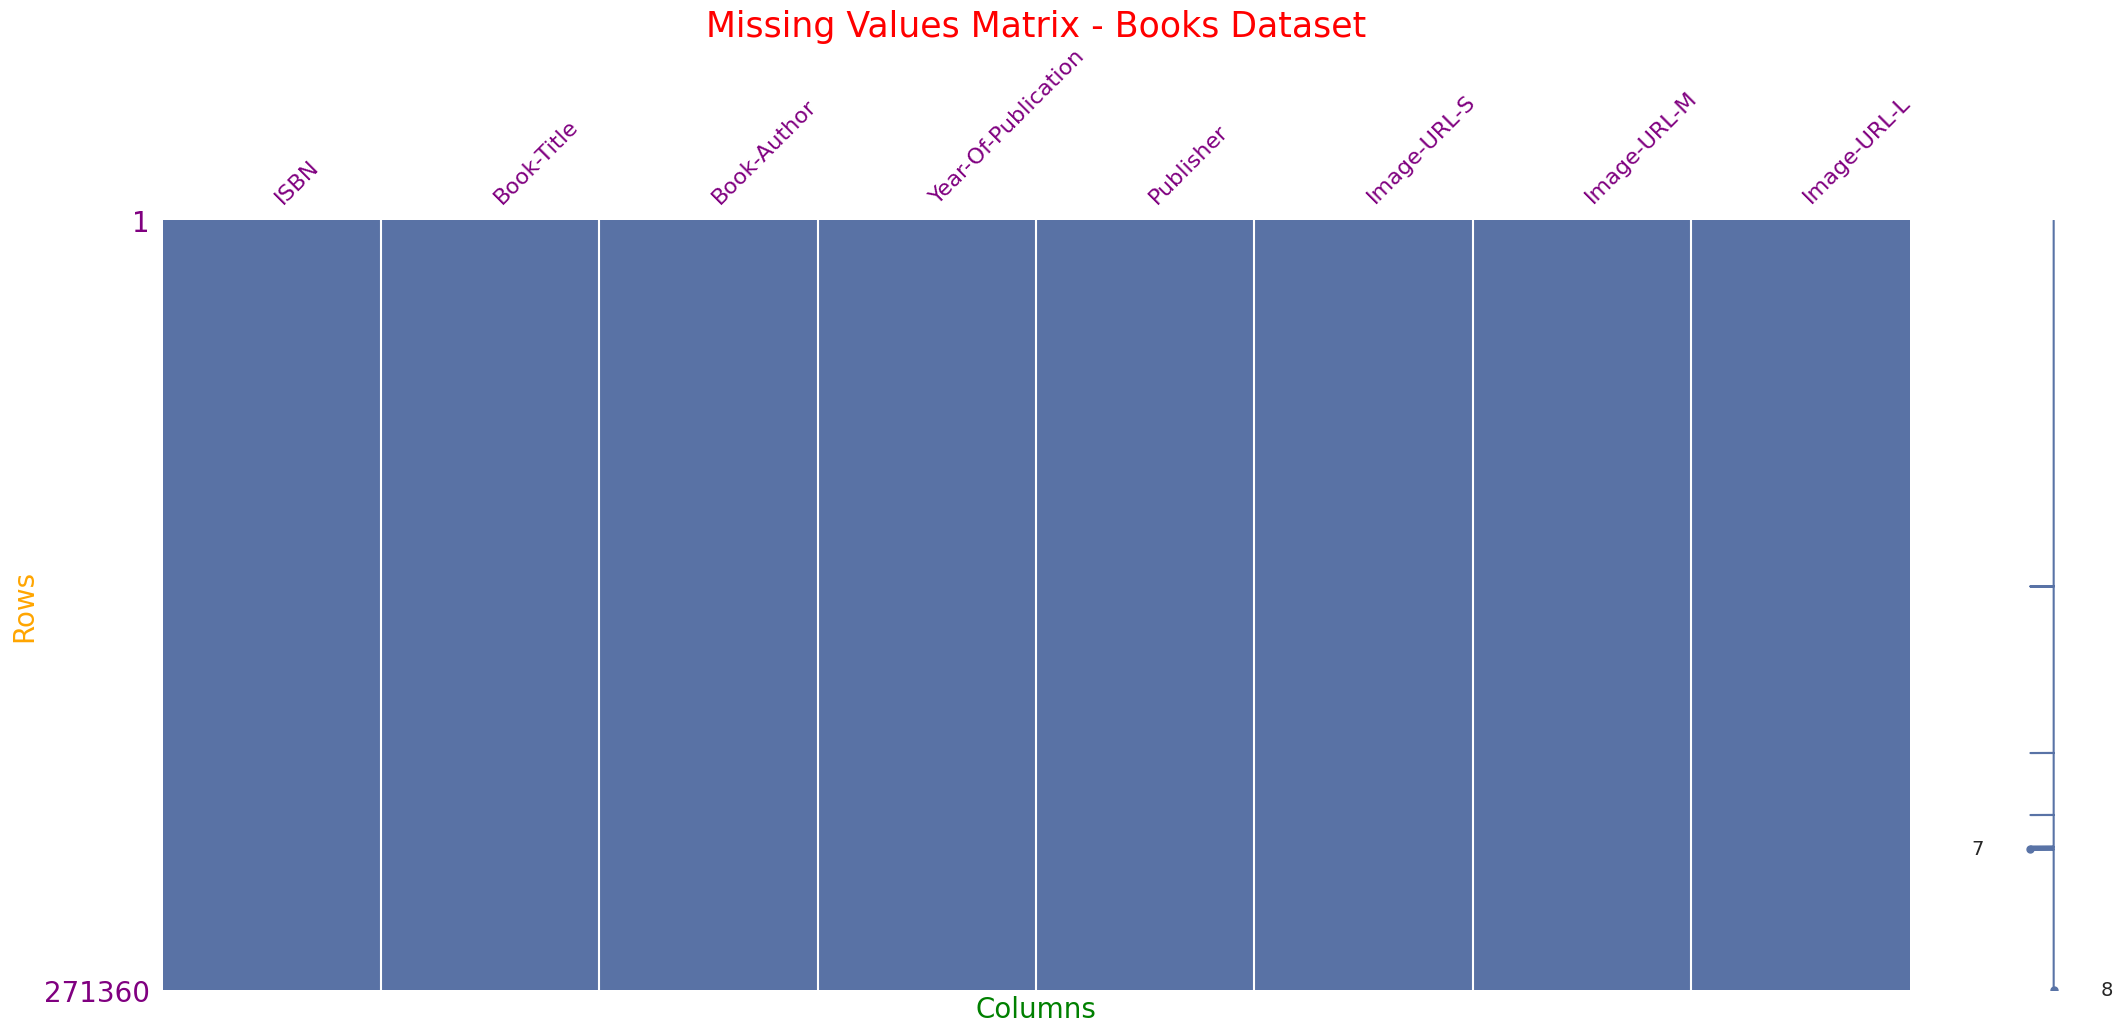

In [686]:
# Visualizing the missing values
# Set the size of the figure
plt.figure(figsize=(7, 5))

# Plot the matrix of missing values with color
msno.matrix(books, color=(0.35, 0.45, 0.65))  # Adjust color as needed

# Add title and labels with color
plt.title('Missing Values Matrix - Books Dataset', fontsize=25, color='RED')
plt.xlabel('Columns', fontsize=20, color='GREEN')
plt.ylabel('Rows', fontsize=20, color='ORANGE')
plt.tick_params(axis='x', colors='purple')
plt.tick_params(axis='y', colors='purple')

# Show the plot
plt.show()


<Figure size 700x500 with 0 Axes>

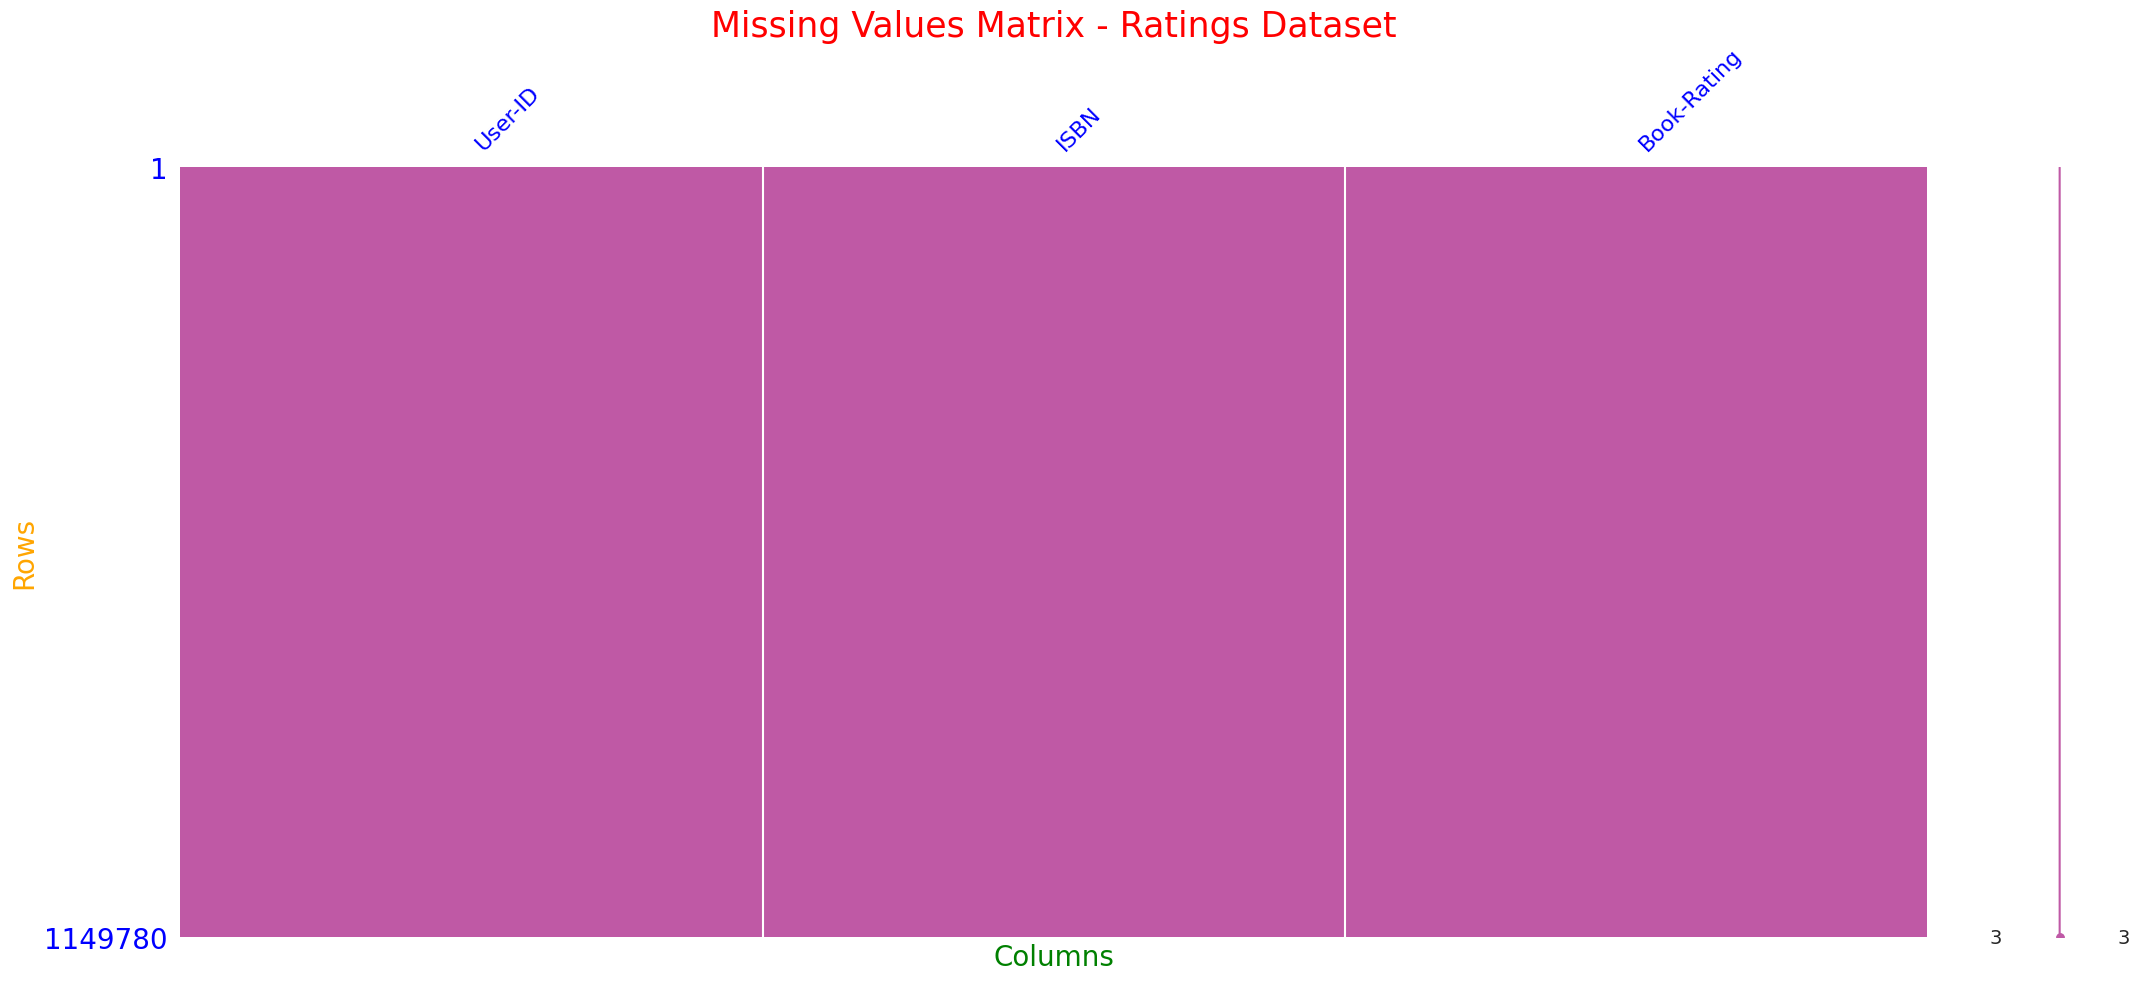

In [687]:
# Visualizing the missing values
# Set the size of the figure
plt.figure(figsize=(7, 5))

# Plot the matrix of missing values with color
msno.matrix(ratings, color=(0.75, 0.35, 0.65))

# Add title and labels with color
plt.title('Missing Values Matrix - Ratings Dataset', fontsize=25, color='RED')
plt.xlabel('Columns', fontsize=20, color='GREEN')
plt.ylabel('Rows', fontsize=20, color='ORANGE')
plt.tick_params(axis='x', colors='blue')
plt.tick_params(axis='y', colors='blue')

# Show the plot
plt.show()


<Figure size 700x500 with 0 Axes>

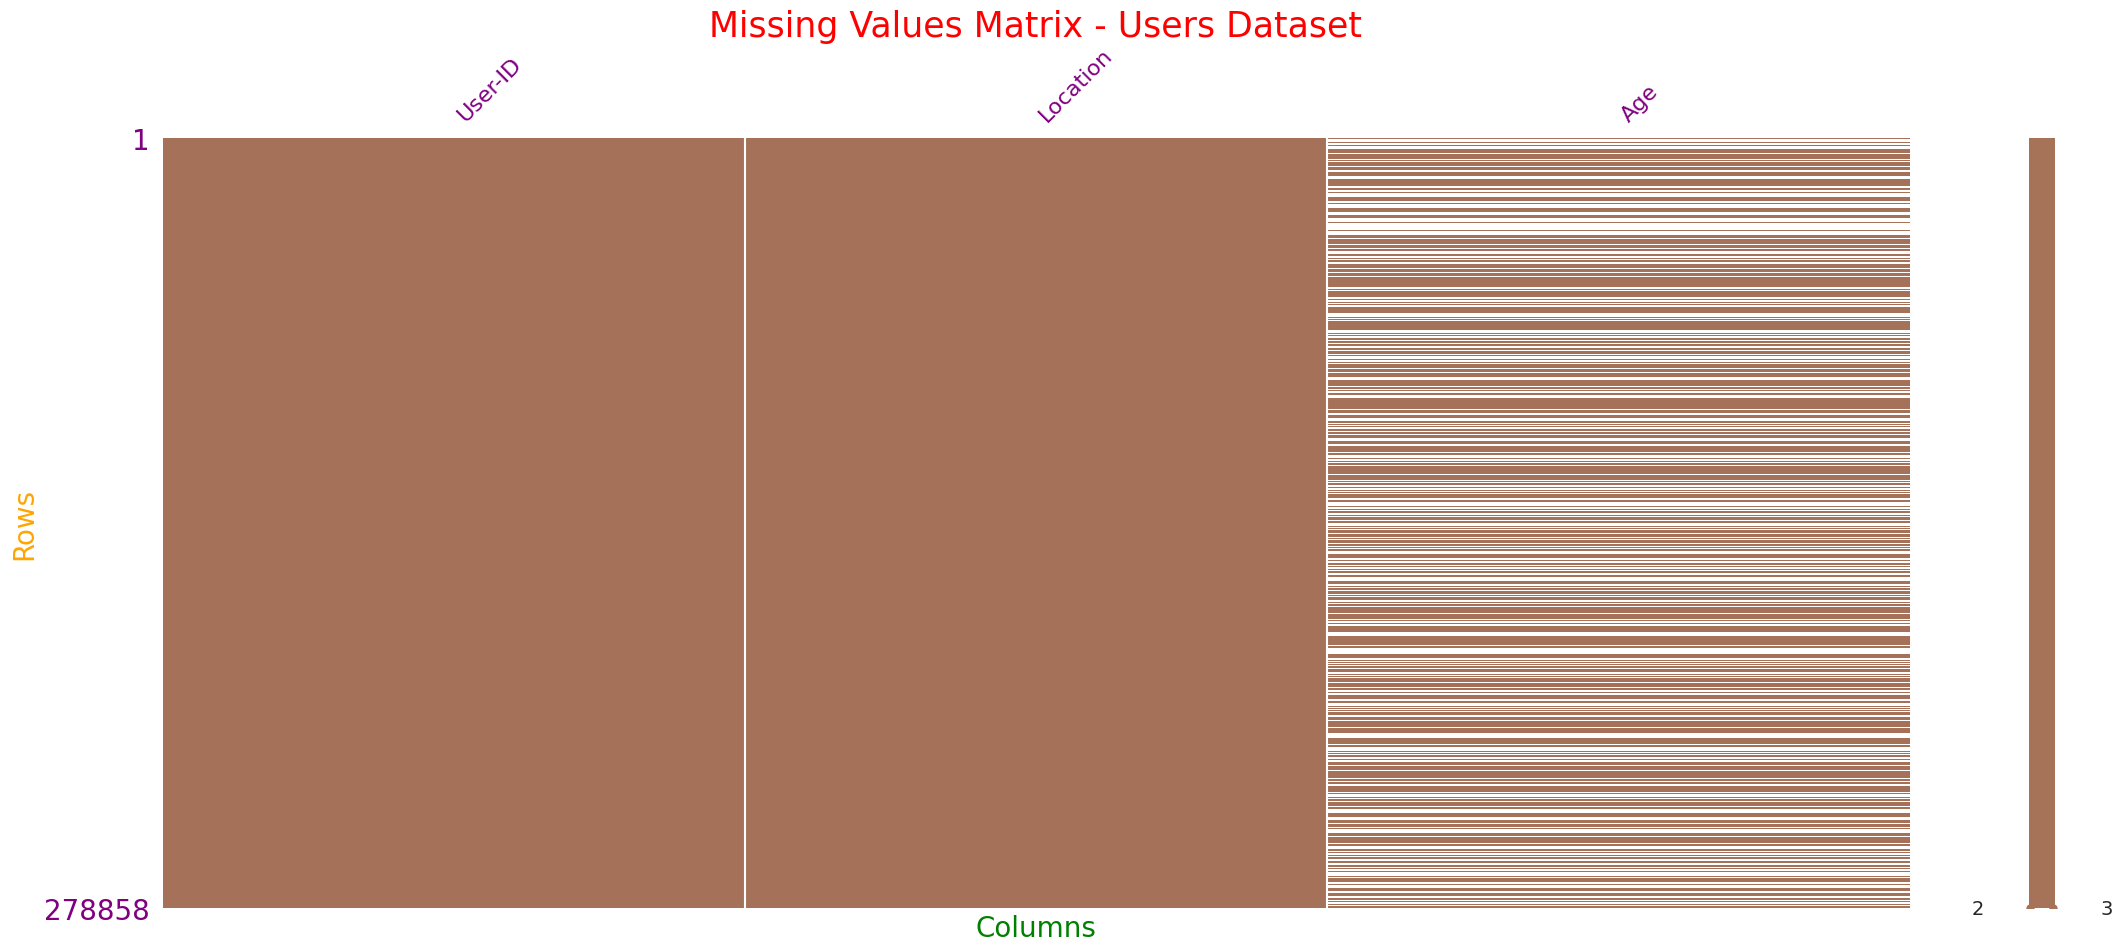

In [688]:
# Visualizing the missing values
# Set the size of the figure
plt.figure(figsize=(7, 5))

# Plot the matrix of missing values with color
msno.matrix(users, color=(0.65, 0.45, 0.35))  # Adjust color as needed

# Add title and labels with color
plt.title('Missing Values Matrix - Users Dataset', fontsize=25, color='RED')
plt.xlabel('Columns', fontsize=20, color='GREEN')
plt.ylabel('Rows', fontsize=20, color='ORANGE')
plt.tick_params(axis='x', colors='purple')
plt.tick_params(axis='y', colors='purple')

# Show the plot
plt.show()


#### <font color='MidnightBlue'>What did you know about your dataset?

- <font color='dark orange'>We get to know that in all of our dataset no columns have much more null values except age column in User dataset.
  
  <font color='green'>(Total missing values = 1,10,762).

## <font color='#191970'>***2. Understanding Your Variables***

### Dataset Columns

In [689]:
# Dataset Columns.


datasets = {
    "Books": books.columns.tolist(),
    "Ratings": ratings.columns.tolist(),
    "Users": users.columns.tolist()
}

for dataset, columns in datasets.items():
    print(f"{Color.HEADER}{dataset} dataset:--\n{Color.GREEN}Index {books.index.name}: {Color.BLUE}{columns}{Color.ENDC}\n{'=' * 79}")


Books dataset:--
Index None: ['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L']
Ratings dataset:--
Index None: ['User-ID', 'ISBN', 'Book-Rating']
Users dataset:--
Index None: ['User-ID', 'Location', 'Age']


### Describe

In [690]:
 # Dataset Describe
books.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271359,271360,271358,271360,271360,271357
unique,271360,242135,102023,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


In [691]:
# Dataset Describe
ratings.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [692]:
# Dataset Describe
users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


### Variables Description

####<font color='red'>Books

- **ISBN -**  International Standard Book Number .
- **Book-Title -**  Title of the book .
- **Book-Author -** Author of the book .
- **Year-Of-Publication -**  Which year books was published .
- **Publisher -**  Who is the Pulisher .
- **Image-URL-S -** URl linking to the cover image, flavour-Small .
- **Image-URL-M -** URl linking to the cover image, flavour-Medium .
- **Image-URL-L -** URl linking to the cover image, flavour-Large .

####<font color='red'> Ratings

- **User-ID -** Identity documentation of the user .
- **ISBN -** International Standard Book Number .
- **Book-Rating -** The rating of the book given by the users .


#### <font color='red'>Users

- **User-ID -** Identity documentation of the user .
- **Location -** Location of the user .
- **Age -** Age of the user .


### Check Unique Values for each variable.

#### <font color='red'>Books

In [693]:
for column in books.columns:
    unique_values_count = books[column].nunique()
    unique_values = books[column].unique()

    print(f"{Color.HEADER}Total Count of Unique values in '{column}' column:{Color.ENDC}{unique_values_count}")
    print(f"{Color.BLUE}Unique Values in '{column}' column:{Color.ENDC}")
    print(unique_values)
    print("=" * 90)


Total Count of Unique values in 'ISBN' column:271360
Unique Values in 'ISBN' column:
['0195153448' '0002005018' '0060973129' ... '006008667X' '0192126040'
 '0767409752']
Total Count of Unique values in 'Book-Title' column:242135
Unique Values in 'Book-Title' column:
['Classical Mythology' 'Clara Callan' 'Decision in Normandy' ...
 'Lily Dale : The True Story of the Town that Talks to the Dead'
 "Republic (World's Classics)"
 "A Guided Tour of Rene Descartes' Meditations on First Philosophy with Complete Translations of the Meditations by Ronald Rubin"]
Total Count of Unique values in 'Book-Author' column:102023
Unique Values in 'Book-Author' column:
['Mark P. O. Morford' 'Richard Bruce Wright' "Carlo D'Este" ...
 'David Biggs' 'Teri Sloat' 'Christopher  Biffle']
Total Count of Unique values in 'Year-Of-Publication' column:202
Unique Values in 'Year-Of-Publication' column:
[2002 2001 1991 1999 2000 1993 1996 1988 2004 1998 1994 2003 1997 1983
 1979 1995 1982 1985 1992 1986 1978 1980 195

#### <font color='red'>Ratings

In [694]:
for column in ratings.columns:
    unique_values_count = ratings[column].nunique()
    unique_values = ratings[column].unique()

    print(f"{Color.HEADER}Total Count of Unique values in '{column}' column: {Color.ENDC}{unique_values_count}")
    print(f"{Color.HEADER}Unique Values in '{column}' column:{Color.ENDC}")
    print(unique_values)
    print("=" * 90)


Total Count of Unique values in 'User-ID' column: 105283
Unique Values in 'User-ID' column:
[276725 276726 276727 ... 276709 276721 276723]
Total Count of Unique values in 'ISBN' column: 340556
Unique Values in 'ISBN' column:
['034545104X' '0155061224' '0446520802' ... '0679752714' '0806917695'
 '05162443314']
Total Count of Unique values in 'Book-Rating' column: 11
Unique Values in 'Book-Rating' column:
[ 0  5  3  6  8  7 10  9  4  1  2]


####<font color='red'> Users

In [695]:
for column in users.columns:
    unique_values_count = users[column].nunique()
    unique_values = users[column].unique()

    print(f"{Color.HEADER}Total Count of Unique values in '{column}' column:{Color.BLUE} {unique_values_count}")
    print(f"{Color.HEADER}Unique Values in '{column}' column:{Color.ENDC}")
    print(unique_values)
    print("=" * 90)


Total Count of Unique values in 'User-ID' column: 278858
Unique Values in 'User-ID' column:
[     1      2      3 ... 278856 278857 278858]
Total Count of Unique values in 'Location' column: 57339
Unique Values in 'Location' column:
['nyc, new york, usa' 'stockton, california, usa'
 'moscow, yukon territory, russia' ... 'sergnano, lombardia, italy'
 'stranraer, n/a, united kingdom' 'tacoma, washington, united kingdom']
Total Count of Unique values in 'Age' column: 165
Unique Values in 'Age' column:
[ nan  18.  17.  61.  26.  14.  25.  19.  46.  55.  32.  24.  20.  34.
  23.  51.  31.  21.  44.  30.  57.  43.  37.  41.  54.  42.  50.  39.
  53.  47.  36.  28.  35.  13.  58.  49.  38.  45.  62.  63.  27.  33.
  29.  66.  40.  15.  60.   0.  79.  22.  16.  65.  59.  48.  72.  56.
  67.   1.  80.  52.  69.  71.  73.  78.   9.  64. 103. 104.  12.  74.
  75. 231.   3.  76.  83.  68. 119.  11.  77.   2.  70.  93.   8.   7.
   4.  81. 114. 230. 239.  10.   5. 148. 151.   6. 101. 201.  96.  84.

## <font color='#191970'>3. ***Data Wrangling***

### Data Wrangling Code

In [696]:
#droping image columns from dataset.
books.drop(['Image-URL-S', 'Image-URL-M','Image-URL-L'], axis=1, inplace=True)

In [697]:
# Write your code to make your dataset analysis ready.

# Merge books and ratings DataFrames
book_ratings = pd.merge(left=books, right=ratings, how='left', left_on='ISBN', right_on='ISBN')
book_ratings = pd.merge(book_ratings, users, on='User-ID', how='inner')
# Display columns of the merged DataFrame in color
print(f"{Color.BOLD}{Color.FAIL}\nColumns in the merged DataFrame:\n{Color.ENDC}")

print(f"{Color.BOLD}{Color.BLUE}{book_ratings.columns}{Color.ENDC}")



Columns in the merged DataFrame:

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'User-ID', 'Book-Rating', 'Location', 'Age'],
      dtype='object')


In [698]:
# Display sample data from the merged DataFrame
print(f"{Color.BOLD}{Color.BLUE}\nSample data from the merged DataFrame:\n")

book_ratings.head()


Sample data from the merged DataFrame:



,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Location,Age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2.0,0.0,"stockton, california, usa",18.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8.0,5.0,"timmins, ontario, canada",NaN
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,8.0,0.0,"timmins, ontario, canada",NaN
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,8.0,0.0,"timmins, ontario, canada",NaN
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,8.0,0.0,"timmins, ontario, canada",NaN


In [699]:
# Display shape of the merged DataFrame in color
print(f"{Color.BOLD}{Color.FAIL}\nShape of the merged DataFrame:\n{Color.GREEN}")
print(book_ratings.shape)



Shape of the merged DataFrame:

(1031136, 9)


In [700]:
# Get the null value count for each column in book_ratings
null_counts = book_ratings.isnull().sum()

# Print the null value counts with color formatting
for column, count in null_counts.items():
    if count > 0:
        print(f"{Color.FAIL}{column}: {count}{Color.ENDC}")
    else:
        print(f"{column}: {count}")


ISBN: 0
Book-Title: 0
Book-Author: 1
Year-Of-Publication: 0
Publisher: 2
User-ID: 0
Book-Rating: 0
Location: 0
Age: 277835


In [701]:


def clean_country_names(df):
    # Extracting country names
    df['Country'] = df['Location'].str.extract(r',\s?(\w*\s?\w*)\"*$')

    # Correcting mispelled country names
    corrections = {
        'australii': 'australia',
        'autralia': 'australia',
        'western australia': 'australia',
        # Add more corrections as needed
    }
    df['Country'].replace(corrections, inplace=True)

    # Grouping similar country names
    country_corrections = {
        'unite states': 'usa',
        # Add more groupings as needed
    }
    df['Country'].replace(country_corrections, inplace=True)

    # Handling miscellaneous values and converting to uppercase
    misc_values = ['', 'xxxxxx', 'universe', 'nowhere', 'x', 'y', 'a', 'öð¹ú', 'the', 'unknown', np.nan, 'n/a', 'aaa', 'z', 'somewherein space']
    df.loc[df['Country'].isin(misc_values), 'Country'] = 'others'
    df['Country'].replace(['the gambia', 'geermany', 'brasil', '_ brasil', 'indiai', 'malaysian'],
                          ['gambia', 'germany', 'brazil', 'brazil', 'india', 'malaysia'], inplace=True)

    # Specific country name corrections
    specific_corrections = {
        'united kindgdom': 'uk',
        'united kingdom': 'uk',
        # Add more specific corrections as needed
    }
    df['Country'].replace(specific_corrections, inplace=True)

    # Converting country names to uppercase
    df['Country'] = df['Country'].str.upper()

    return df

# Cleaning and correcting country names in book_ratings
book_ratings = clean_country_names(book_ratings)

# Dropping the 'Location' column
book_ratings.drop('Location', axis=1, inplace=True)

# Displaying unique country names after cleaning
unique_countries = book_ratings['Country'].unique()
print(unique_countries)


['USA' 'CANADA' 'OTHERS' 'MALAYSIA' 'SPAIN' 'NEW ZEALAND' 'FINLAND' 'UK'
 'NETHERLANDS' 'PORTUGAL' 'BRAZIL' 'GERMANY' 'AUSTRIA' 'ITALY' 'AUSTRALIA'
 'FRANCE' 'COSTA RICA' 'POLAND' 'US' 'IRAN' 'ARUBA' 'INDONESIA' 'INDIA'
 'PAKISTAN' 'TAIWAN' 'SINGAPORE' 'ARGENTINA' 'ROMANIA' 'GREECE' 'IRELAND'
 'PHILIPPINES' 'BELGIUM' 'MEXICO' 'SOUTH AFRICA' 'BURKINA FASO' 'CROATIA'
 'SWITZERLAND' 'DENMARK' 'RWANDA' 'YUGOSLAVIA' 'TURKEY' 'CHINA' 'JAPAN'
 'QATAR' 'LATVIA' 'SWEDEN' 'KUWAIT' 'NEPAL' 'PERU' 'VENEZUELA'
 'SOUTH KOREA' 'HONG KONG' 'UNITED STATES' 'SLOVAKIA' 'NORWAY'
 'DOMINICAN REPUBLIC' 'MACEDONIA' 'KENYA' 'MAURITIUS' 'CATALONIA'
 'NIGERIA' 'MADAGASCAR' 'ISRAEL' 'OMAN' 'EGYPT' 'LITHUANIA' 'GUATEMALA'
 'EUSKAL HERRIA' 'RUSSIA' 'BERMUDA' 'ANTARCTICA' 'ANDORRA' 'UNITED STATE'
 'CZECH REPUBLIC' 'BULGARIA' 'ENGLAND' 'SLOVENIA' 'CHILE' 'K1C7B1'
 'LUXEMBOURG' 'ICELAND' 'HONDURAS' 'ZAMBIA' 'ZIMBABWE' 'PHILLIPINES'
 'BELIZE' 'CYPRUS' 'PUERTO RICO' 'ALBANIA' 'MOZAMBIQUE' 'CAYMAN ISLANDS'
 'TDZIMI' 'VA

In [702]:
book_ratings.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'User-ID', 'Book-Rating', 'Age', 'Country'],
      dtype='object')

In [ ]:
# Popular 20 Books with aligned Ratings Count
popular_books = book_ratings.groupby('Book-Title')['Book-Rating'].count().sort_values(ascending=False)[:20]

print(f"{Color.HEADER}Top 20 Popular Books based on Ratings:{Color.ENDC}\n")
print(f"{Color.BOLD}{Color.FAIL}{'Book Title':<55}{'Ratings Count':>02}{Color.ENDC}\n")

for book, rating_count in popular_books.items():
    print(f"{Color.GREEN}{book:<60}{Color.BLUE}{rating_count:>02}{Color.ENDC}")


Top 20 Popular Books based on Ratings:

Book Title                                             Ratings Count

Wild Animus                                                 2502
The Lovely Bones: A Novel                                   1295
The Da Vinci Code                                           898
A Painted House                                             838
The Nanny Diaries: A Novel                                  828
Bridget Jones's Diary                                       815
The Secret Life of Bees                                     774
Divine Secrets of the Ya-Ya Sisterhood: A Novel             740
The Red Tent (Bestselling Backlist)                         723
Angels &amp; Demons                                         670
Life of Pi                                                  664
Snow Falling on Cedars                                      662
The Summons                                                 655
The Notebook                                            

In [ ]:
# Popular 20 Book Authors/Writer with formatted output
popular_authors = book_ratings.groupby('Book-Author')['Book-Rating'].count().sort_values(ascending=False)[:20]

print(f"{Color.HEADER}Top 20 Popular Book Authors based on Ratings:{Color.ENDC}\n")
print(f"{Color.BOLD}{'Book Author':<30}{'Ratings Count':>10}{Color.ENDC}")

for author, rating_count in popular_authors.items():
    print(f"{Color.GREEN}{author:<30}{Color.BLUE}{rating_count:>10}{Color.ENDC}")


In [ ]:
# Popular 20 Publishers with formatted output
popular_publishers = book_ratings.groupby('Publisher')['Book-Rating'].count().sort_values(ascending=False)[:20]

print(f"{Color.HEADER}Top 20 Popular Publishers based on Ratings:{Color.ENDC}\n")
print(f"{Color.BOLD}{'Publisher':<30}{'Ratings Count':>10}{Color.ENDC}")

for publisher, rating_count in popular_publishers.items():
    print(f"{Color.GREEN}{publisher:<30}{Color.BLUE}{rating_count:>10}{Color.ENDC}")


## <font color='#191970'>***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code
# Creating dataframe by using value count function on year column.
df = book_ratings['Year-Of-Publication'].value_counts().rename_axis('unique_values').reset_index(name='counts')

#Converted the object to datetime format.
df['unique_values'] = pd.to_datetime(df['unique_values'],errors='coerce')

# Setting the index.
dataframe = df.set_index('unique_values')
dataframe

# plotting line graph.
dataframe['Change'] = dataframe.counts
dataframe['Change'].plot(figsize=(15, 8),
                         xlabel = "Year-Of-Publication",
                         ylabel = "Counts Difference",
                         title = "Shift Plot",
                         color='orange')


##### **Insights from the above graph :**

**Why did I pick the specific chart?**
- I used the line chart because it was giving better visualisation.

**What is/are the insight(s) found from the chart?**
- Around the year 1970  max. number of the books was published by the authors.
- After the year 2005 books are being published near to the none.
- we have some wrong data as well because there are some books are being published even before the year has come i.e., (2023-2040).


#### Chart - 2

In [ ]:
# Chart - 2: Visualization for Book Authors

# Filtering the authors with counts greater than 2400
df_Author = book_ratings['Book-Author'].value_counts().rename_axis('unique_values').reset_index(name='counts')
df_Author = df_Author[df_Author['counts'] > 2400]

# Using Seaborn for visualization with the 'icefire' palette
plt.figure(figsize=(10, 6))
sns.barplot(x='counts', y='unique_values', data=df_Author, palette='icefire')
plt.xlabel('Counts')
plt.ylabel('Book Author')
plt.title('Visualization for Book Authors with Counts > 2400')
plt.show()


##### **Insights from the above graph :**

**Why did I pick the specific chart?**
- I used this bar chart to understand those writers who have pulished more than 2400 books.

**What is/are the insight(s) found from the chart?**
- I found that **Stephen King** has written maximum number of books.

#### Chart - 3

In [ ]:
# Chart - 3 visualization code for Top Publishers by Book Count

# Count the occurrences of each publisher
publisher_counts = book_ratings['Publisher'].value_counts()

# Create a DataFrame with publisher counts
df_publisher = publisher_counts.rename_axis('unique_values').reset_index(name='counts')

# Filter publishers with counts above 1500
df_publisher = df_publisher[df_publisher['counts'] > 4500]

# Plotting with seaborn
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.barplot(x='counts', y='unique_values', data=df_publisher, palette='icefire')
plt.xlabel('Counts')
plt.ylabel('Publishers')
plt.title('Top Publishers by Book Count')
plt.show()


##### **Insights from the above graph :**

**Why did I pick the specific chart?**
- I used this bar chart to understand those publisher who have pulished more than 4500 books.

**What is/are the insight(s) found from the chart?**
- I found that **Ballantine Books** has published maximum number of books.

#### Chart - 4

In [ ]:
# Chart - 4 visualization code for Distribution of Book Ratings

# Increase figure size for better visibility
plt.figure(figsize=(10, 6))

# Set style and context for seaborn
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)

# Plotting the countplot
ax = sns.countplot(data=ratings, x='Book-Rating', palette='icefire')

# Labeling axes and title
ax.set_xlabel("Book Rating", labelpad=12)
ax.set_ylabel("Count of Ratings", labelpad=12)
ax.set_title("Distribution of Book Ratings", pad=20)

# Adding annotations (optional)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


##### **Insights from the above graph :**

**Why did I pick the specific chart?**
-  I used this bar chart to understand ratings from the different users.

**What is/are the insight(s) found from the chart?**
- I found that 8 star rating is most most fequent rating done by the maximum number of users.

#### Chart - 5

In [ ]:
# Chart - 5 visualization code for the Age distribution of users

#  'book_ratings' DataFrame contains 'Age' column
df_users = book_ratings['Age'].value_counts().rename_axis('unique_values').reset_index(name='counts')

# Filtering ages with counts greater than 1 (excluding singular occurrences)
df_users = df_users[df_users['counts'] >= 1]

# Sorting by age for better visualization
df_users = df_users.sort_values('unique_values')

# Ensure 'unique_values' column is treated as integers
df_users['unique_values'] = df_users['unique_values'].astype(int)

# Plotting the age distribution using Matplotlib with specific customizations
plt.figure(figsize=(18, 8))
plt.bar(df_users['unique_values'], df_users['counts'], color='black',edgecolor='red')  # Using 'flare' color
plt.xlabel('Age')
plt.ylabel('Count of Users')
plt.title('Age Distribution of Users')
plt.xticks(range(0, int(max(df_users['unique_values'])) + 1, 10))  # Customizing x-axis ticks to intervals of 10
plt.tight_layout()

plt.show()


##### **Insights from the above graph :**

**Why did I pick the specific chart?**
-  I used this bar chart to understand age differences of the users.

**What is/are the insight(s) found from the chart?**
- I found that maxiumum number of people are in the age group of 20-40.
- It has many missing values and outliers as well , outliers are in the age group of 100 and above. Total number of outliers are around 350-500.

#### Chart - 6

In [ ]:
# Chart - 6 visualization code for most popular books

#  'book_ratings' is the merged DataFrame containing necessary columns like 'Book-Title' and 'Book-Rating'

book_ratingCount = (book_ratings.groupby(by='Book-Title')['Book-Rating']
                    .count().reset_index().rename(columns={'Book-Rating': 'totalRatingCount'}))

# Filter books with total rating counts greater than or equal to 600
book_ratingCount = book_ratingCount[book_ratingCount['totalRatingCount'] >= 600]

# Sort books by total rating counts
book_ratingCount = book_ratingCount.sort_values(by='totalRatingCount', ascending=False)

# Plotting the top-rated books by total rating count using Seaborn for color palette
plt.figure(figsize=(10, 8))
sns.barplot(x='totalRatingCount', y='Book-Title', data=book_ratingCount, palette='viridis')
plt.xlabel('Total Rating Count')
plt.title('Top-rated Books by Total Rating Count')
plt.tight_layout()

plt.show()


##### **Insights from the above graph :**

**Why did I pick the specific chart?**
-  I used this bar chart to understand total number of user's count who have done rating.

**What is/are the insight(s) found from the chart?**
- I have short listed only those books who have gotten more than 600 user's rating.
- I have found that "WILD ANIMUS BOOK" has been rated by more than 2000 users.


#### Chart- 7

In [ ]:
# countries with most readers

plt.figure(figsize=[8, 5])
countries = book_ratings.groupby('Country')['User-ID'].nunique().reset_index().sort_values(by='User-ID', ascending=False)[:10]
sns.barplot(data=countries, y='Country', x='User-ID', palette='icefire')
plt.xlabel('Number of Users')
plt.ylabel('Country')
plt.title('Top Countries with Most Readers')
plt.tight_layout()

plt.show()


In [ ]:
import plotly.graph_objects as go

# Creating dataframe for Publisher
countries = pd.DataFrame(book_ratings['Country'].value_counts().head(10))
countries = countries.rename(columns={'Country': 'count'})

# Plotting the interactive pie plot in percentage of Top 10 countries
data = {
    "values": countries['count'],
    "labels": countries.index,
    "domain": {"column": 0},
    "name": "Country Name",
    "hoverinfo": "label+percent+name",
    "hole": .4,
    "type": "pie"
}
layout = go.Layout(title="<b>Percentage of Top 10 Countries</b>", legend=dict(x=.8, y=1.0, orientation="v"))
data = [data]
fig = go.Figure(data=data, layout=layout)
fig.update_layout(title_x=0.5)
fig.show()


* Most of the readers are from the United States with 75.2% followed by Canada of the top 10 countries.

## <font color='#191970'>**EDA CONCLUSIONS**


---

*  <font color='red'>The Lovely Bones: A Novel and Wild Animus are the two most read books.


* <font color='#blue'> Most popular book author based on the number of ratings is Stephan King .



*  <font color='####191970'>Ballantine Books and Pocket are the top publishers based on the number of ratings that their books have received.



*  <font color='###191970'>The majority of readers are between the ages of 20 and 40.



*  <font color='##191970'>The majority of readers who have given the books ratings are from the United States and Canada.



*  <font color='##red'>Regardless of the age group, The Lovely Bones and Wild animus appear on lists of the top-rated books.



## <font color='#191970'>***5. Feature Engineering & Data Pre-processing***

### 1. Feature Manipulation & Selection

#### 1.1 Filtering Users and Ratings

In [ ]:

# Filtering Users and Ratings
def filter_users_ratings(book_ratings):
    # Finding users who rated more than 200 books
    users_rated_more_than_200 = book_ratings['User-ID'].value_counts() > 200
    active_users = users_rated_more_than_200[users_rated_more_than_200].index
    # Filtering ratings for active users
    filtered_ratings = book_ratings[book_ratings['User-ID'].isin(active_users)]
    return filtered_ratings



#### 1.2 Filtering Books with Ratings

In [ ]:
# Filtering Books with Ratings
def filter_books_with_ratings(ratings_with_books, min_ratings=50):
    # Grouping by Book-Title and counting ratings
    book_ratings_count = ratings_with_books.groupby('Book-Title')['Book-Rating'].count().reset_index()
    book_ratings_count.rename(columns={'Book-Rating': 'num_of_ratings'}, inplace=True)
    # Merging book ratings count with the ratings data
    final_rating = ratings_with_books.merge(book_ratings_count, on='Book-Title')
    # Filtering books with more than 'min_ratings' ratings
    final_rating = final_rating[final_rating['num_of_ratings'] >= min_ratings]
    # Dropping duplicates
    final_rating.drop_duplicates(['User-ID', 'Book-Title'], inplace=True)
    return final_rating


#### 2. Feature Selection

In [ ]:
# Create a pivot table for collaborative filtering
def create_pivot_table(filtered_ratings):
    book_pivot = filtered_ratings.pivot_table(columns='User-ID', index='Book-Title', values='Book-Rating', aggfunc='mean')
    book_pivot.fillna(0, inplace=True)
    return book_pivot


####  Creating Pivot Table for Collaborative Filtering

In [ ]:
# Creating Pivot Table for Collaborative Filtering
# Filter users and ratings
filtered_data = filter_users_ratings(book_ratings)
# Filter books with a minimum number of ratings
final_filtered_data = filter_books_with_ratings(filtered_data, min_ratings=50)
# Create pivot table for collaborative filtering
book_pivot = create_pivot_table(final_filtered_data)
book_pivot.head()

### 2. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
book_pivot.fillna(0, inplace=True)

# Keeping books' names for reference
book_names = book_pivot.index

In [ ]:
book_pivot

#### What all missing value imputation techniques have you used and why did you use those techniques?

- We have used the fillna() method to fill all the null value with 0 (zero).

### 3.Sparse Matrix Creation

In [ ]:
# Sparse your data

from scipy.sparse import csr_matrix
book_sparse = csr_matrix(book_pivot)

In [ ]:
 # Keeping books' names for reference
book_names = book_pivot.index

##### Which method have you used to scale you data and why?

- We have Sparse matrix to scale the features.

## <font color='#191970'>***6. ML Model Implementation***

### ML Model -1 (NearestNeighbors)

In [ ]:
# Model - User-based Collaborative Filtering (Nearest Neighbors)


model_user_based = NearestNeighbors(algorithm='brute')
model_user_based.fit(book_sparse)


### ML Model - 2 (KMeans)

In [ ]:


# ML Model - 2 (KMeans) - Content-Based Filtering
# Load the dataset
df = book_ratings.dropna()
titles = df['Book-Title']

# Feature Extraction from Book Titles
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(titles)

# KMeans clustering for content-based approach
kmeans_content_based = KMeans(n_clusters=10)
kmeans_content_based.fit(X)

# Finding value of K
wcss = []
for i in range(1, 17):
    km = KMeans(n_clusters=i)
    km.fit(book_sparse)
    wcss.append(km.inertia_)

plt.plot(range(1, 17), wcss)

In [ ]:
# ML Model - 3 Implementation
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)

#Recommend Similar Books
new_title = "Harry Potter and the Chamber of Secrets"
new_X = vectorizer.transform([new_title])
cluster = kmeans.predict(new_X)[0]
cluster_books = df[kmeans.labels_ == cluster]["Book-Title"]
cluster_books.drop_duplicates(inplace=True)
df = pd.DataFrame(cluster_books)
df.head(10)


In [ ]:
# Predict on the model
distances, suggestions = model_user_based.kneighbors(book_pivot.iloc[1, :].values.reshape(1, -1))
suggestions

In [ ]:
#let us print all the suggested books.
for i in range(len(suggestions)):
  print(book_names[suggestions[i]])

In [ ]:
book_names[237]


In [ ]:
# Combined Recommendation Function
def combined_book_recommender(book_title):
    # User-based recommendation
    book_index = np.where(book_pivot.index == book_title)[0][0]
    _, user_based_suggestions = model_user_based.kneighbors(book_pivot.iloc[book_index, :].values.reshape(1, -1))

    # Content-based recommendation
    new_X = vectorizer.transform([book_title])
    cluster = kmeans_content_based.predict(new_X)[0]
    content_based_suggestions = final_filtered_ratings[kmeans_content_based.labels_ == cluster]["Book-Title"]
    content_based_suggestions = content_based_suggestions.drop_duplicates().tolist()

    # Combining both sets of recommendations
    user_based_books = book_pivot.index[user_based_suggestions.flatten()].tolist()
    combined_recommendations = list(set(user_based_books) | set(content_based_suggestions))

    return combined_recommendations[:10]  # Return top 10 recommendations


### 2. Which ML model did you choose from the above created models as your final prediction model and why?

- We have selected NearestNeighbors model as our final prediction model.
- Because NearestNeighbors model was suggesting more similar books than K-means model.

### 3. Explain the model which you have used ?

- We have used the NearestNeighbors model which is works on the "Content-Based Recommendation sytem".  

## <font color='#191970'>***7.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
import pickle

# Save the model
with open('/content/model_saved.pkl', 'wb') as file:
    pickle.dump(model, file)

# Save book names
with open('/content/book_names.pkl', 'wb') as file:
    pickle.dump(book_names, file)

# Save filtered ratings
with open('/content/final_filtered_ratings.pkl', 'wb') as file:
    pickle.dump(final_filtered_ratings, file)

# Save the pivot table
with open('/content/book_pivot.pkl', 'wb') as file:
    pickle.dump(book_pivot, file)


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.


# Load the model
with open('/content/model_saved.pkl', 'rb') as file:
    model = pickle.load(file)

# Load other objects as needed
# ...

# Example: Make predictions with loaded model using unseen data
#predictions = model.predict(unseen_data)


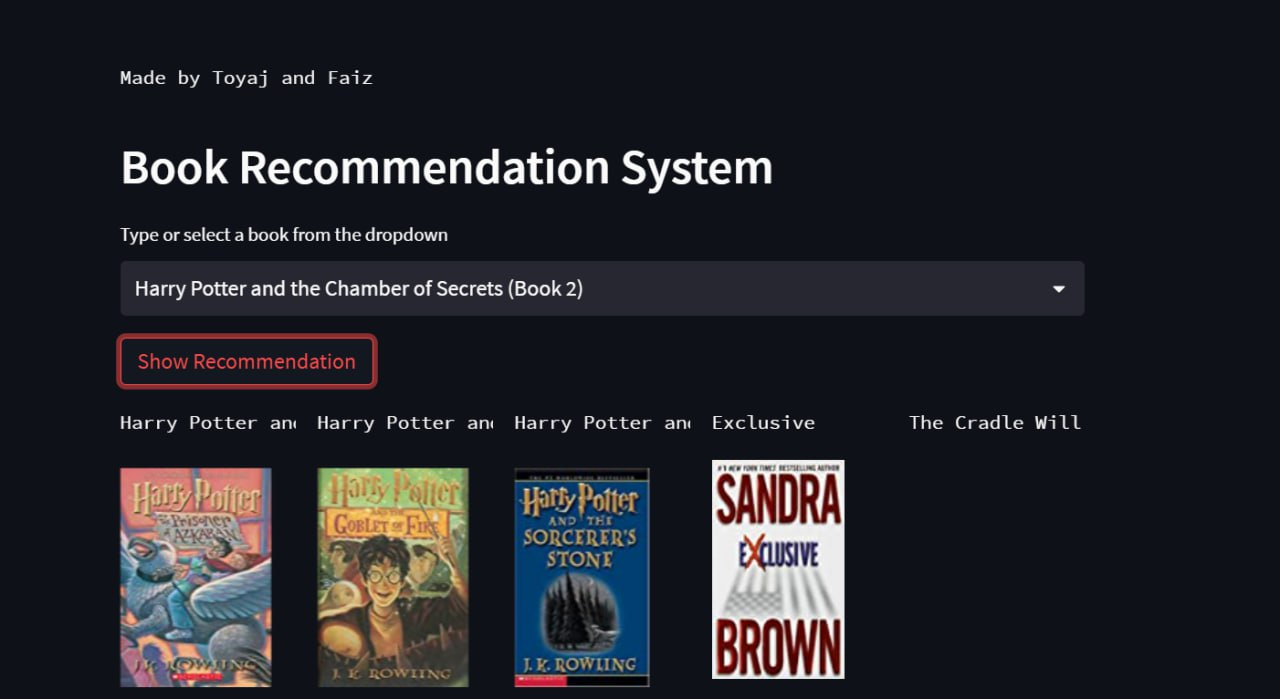

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

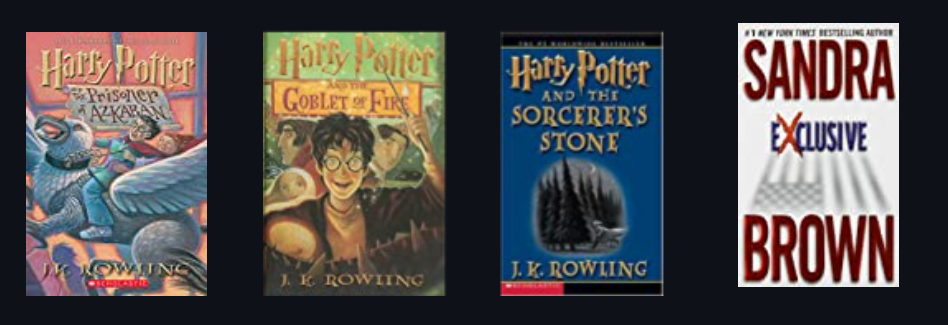

# <font color='#191970'>**Conclusion**

- In conclusion, a book recommender system can be a valuable tool for both book enthusiasts and businesses in the book industry. By analyzing user preferences and behavior, a recommender system can provide personalized book recommendations that improve the user's overall reading experience and increase their engagement with the platform.

- Businesses can also benefit from a book recommender system by increasing customer satisfaction, retention, and revenue. With a personalized book recommendation system, businesses can create a competitive advantage by offering tailored book recommendations that are more likely to result in book purchases.

- However, creating effective book recommender system was the challenge, requiring a comprehensive understanding of machine learning algorithms, data analysis, and user behavior.

- Overall, a book recommender system can be a powerful tool for both book enthusiasts and businesses in the book industry, but it requires careful consideration and implementation to be successful.

### <font color='MidnightBlue'>***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***

In [ ]:
# Save the File
import pickle
pickle.dump(model,open('/content/model_saved','wb'))
pickle.dump(book_names,open('/content/model_saved','wb'))
pickle.dump(final_filtered_ratings,open('/content/model_saved','wb'))
pickle.dump(book_pivot,open('/content/model_saved','wb'))

In [ ]:


def filter_users_ratings(ratings, books):
    # Finding users who rated more than 200 books
    users_rated_more_than_200 = ratings['User-ID'].value_counts() > 200
    active_users = users_rated_more_than_200[users_rated_more_than_200].index

    # Filtering ratings for active users
    filtered_ratings = ratings[ratings['User-ID'].isin(active_users)]

    # Merging ratings with book details
    ratings_with_books = filtered_ratings.merge(books, on='ISBN')

    return ratings_with_books

def filter_books_with_ratings(ratings_with_books, min_ratings=50):
    # Grouping by Book-Title and counting ratings
    book_ratings_count = ratings_with_books.groupby('Book-Title')['Book-Rating'].count().reset_index()
    book_ratings_count.rename(columns={'Book-Rating': 'num_of_ratings'}, inplace=True)

    # Merging book ratings count with the ratings data
    final_rating = ratings_with_books.merge(book_ratings_count, on='Book-Title')

    # Filtering books with more than 'min_ratings' ratings
    final_rating = final_rating[final_rating['num_of_ratings'] >= min_ratings]

    # Dropping duplicates
    final_rating.drop_duplicates(['User-ID', 'Book-Title'], inplace=True)

    return final_rating

# Example usage:
# Filter users and ratings
filtered_ratings = filter_users_ratings(ratings, books)

# Filter books with a minimum number of ratings
final_filtered_ratings = filter_books_with_ratings(filtered_ratings, min_ratings=50)
